In [1]:
from pipeline_freeu_training import FreeUTrainingPipeline, cuda_memory_profiler
from matplotlib import pyplot as plt
import torch
from diffusers.pipelines.stable_diffusion import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"
with cuda_memory_profiler():
    #pip_1_5 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", safety_checker = None).to('cpu')
    pip_1_5 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32, safety_checker = None)

with cuda_memory_profiler():
    training = FreeUTrainingPipeline(
        text_encoder=pip_1_5.text_encoder,
        tokenizer=pip_1_5.tokenizer,
        unet=pip_1_5.unet,
        scheduler=pip_1_5.scheduler,
    )



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


Peak memory usage: 0.00 MB
Memory allocated at start: 0.00 MB
Memory allocated at end: 0.00 MB
Net memory change: 0.00 MB
Peak memory usage: 0.00 MB
Memory allocated at start: 0.00 MB
Memory allocated at end: 0.00 MB
Net memory change: 0.00 MB


  0%|          | 0/20 [00:00<?, ?it/s]

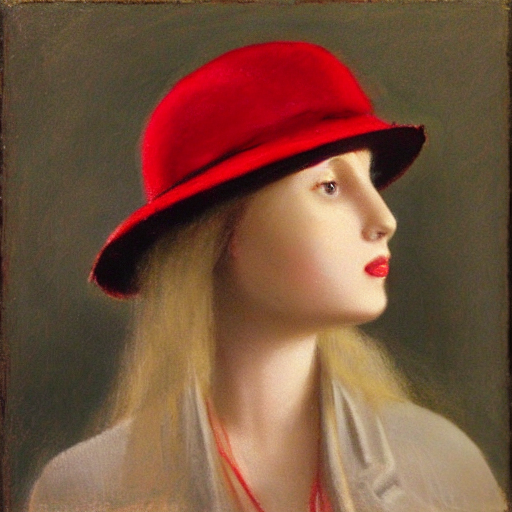

In [2]:
prompt = "A girl in a red hat"
seed = 1

pip_1_5 = pip_1_5.to("cuda")
torch.manual_seed(seed)
image = pip_1_5(prompt, seed=seed, num_inference_steps=20)
pip_1_5 = pip_1_5.to("cpu")
image.images[0]

In [3]:
prompts = [
    [
        "A drone  view of celebration with Christmas tree and fireworks, starry sky - background.",
    ],
    [
        "happy dog wearing a yellow turtleneck, studio, portrait, facing camera, studio, dark bg"
    ],
    [
        "Campfire at night in a snowy forest with starry sky in the background."
    ],
    [
        "a fantasy landscape, trending on artstation"
    ],
    [
        "Busy freeway at night."
    ],
    [
        "An astronaut is riding a horse in the space in a photorealistic style."
    ],
    [
        "Turtle swimming in ocean."
    ],
    [
        "A storm trooper vacuuming the beach."
    ],
    [
        "An astronaut feeding ducks on a sunny afternoon, reflection from the water."
    ],
    [
        "Fireworks."
    ],
    [
        "A fat rabbit wearing a purple robe walking through a fantasy landscape."
    ],
    [
        "A koala bear playing piano in the forest."
    ],
    [
        "An astronaut flying in space, 4k, high resolution."
    ],
    [
        "Flying through fantasy landscapes, 4k, high resolution."
    ],
    [
        "A small cabin on top of a snowy mountain in the style of Disney, artstation",
    ],
    [
        "half human half cat, a human cat hybrid",
    ],
    [
        "a drone flying over a snowy forest."
    ],
    [
        "a woman wearing a floral hat."
    ]
]


In [4]:
results = {}
for e in range(10):
    for i, p in enumerate(prompts):
        torch.manual_seed(seed)
        loss_per_step = training(p, device=torch.device("cuda"))
        results[i] = loss_per_step
        print(f"Prompt complete: Loss - {loss_per_step}")

Streaming output truncated to the last 5000 lines.
Net memory change: 0.38 MB
Step 18/21: loss=0.0017337780445814133 torch.Size([2, 4, 64, 64]) torch.Size([2, 4, 64, 64])
Step 19/21: loss=0.0015745917335152626 torch.Size([2, 4, 64, 64]) torch.Size([2, 4, 64, 64])
Step 20/21: loss=0.001465196255594492 torch.Size([2, 4, 64, 64]) torch.Size([2, 4, 64, 64])
Step 21/21: loss=0.0003655949840322137 torch.Size([2, 4, 64, 64]) torch.Size([2, 4, 64, 64])
Prompt complete: Loss - [1.8319858554605162e-06, 8.298907800963207e-07, 7.58556211621908e-07, 8.731185516808182e-07, 1.6475148640893167e-06, 7.721000656601973e-06, 8.3393111708574e-05, 4.756042471854016e-05, 6.606821261812001e-05, 0.00013735944230575114, 0.0002979465643875301, 0.00032760933390818536, 0.00046202345401979983, 0.0017209072830155492, 0.0008769464329816401, 0.0023637302219867706, 0.0009865709580481052, 0.0017337780445814133, 0.0015745917335152626, 0.001465196255594492, 0.0003655949840322137]
Step 1/21: loss=1.749193529576587e-06 torc

  0%|          | 0/20 [00:00<?, ?it/s]

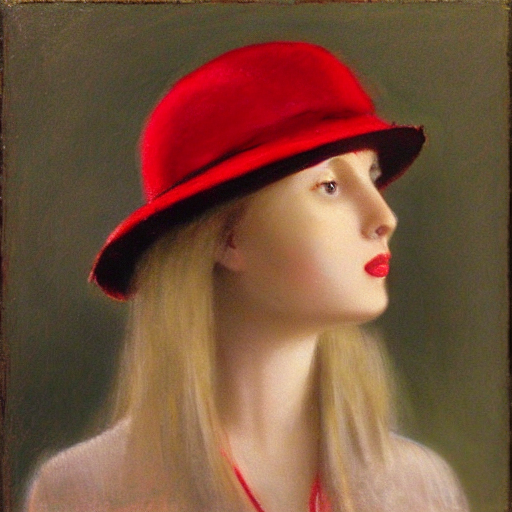

In [5]:
from matplotlib import pyplot as plt
pip_1_5.unet = training.unet
pip_1_5 = pip_1_5.to('cuda')
torch.manual_seed(seed)
image = pip_1_5(prompt, seed=seed, num_inference_steps=20)
pip_1_5 = pip_1_5.to("cpu")
image.images[0]


In [6]:
pip_1_5.unet.save_pretrained('/content/unet.2')

In [2]:
!pip install diffusers
!pip install accelerate
!pip install matplotlib
!pip install safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 6.9 MB/s eta 0:00:00
